<span style="font-family: Helvetica; font-weight:bold;font-size:2.5em;color:#581845"> E-News Express Project 2 Analysis
    
<span style="font-family: Helvetica; font-weight:bold;font-size:1.5em;color:#01797D"> Brandy Murray
    

<span style="font-family: Helvetica; font-weight:bold;font-size:1.5em;color:#581845" >Description

<span style="font-family: Helvetica;font-size:1.0em;color:black" >An online news portal aims to expand its business by acquiring new subscribers. Every visitor to the websites takes certain actions based on their interest. The company plans to analyze these interests and wants to determine whether a new feature will be effective or not. Companies often analyze user's response to two variants of a product to decide which of the two variants is more effective. This experimental technique is known as a/b testing that is used to determine whether a new feature attracts users based on a chosen metric.

<span style="font-family: Helvetica;font-size:1.0em;color:black" >Suppose you are hired as a Data Scientist in E-News Express. The design team of the company has created a new landing page. You have been assigned the task to decide whether the new landing page is more effective to gather new subscribers. Suppose you randomly selected 100 users and divided them equally into two groups. The old landing page is served to the first group (control group) and the new landing page is served to the second group (treatment group). Various data about the customers in both groups are collected in 'abtest.csv'. Perform the statistical analysis toa nswer the following questions using the collected data.

<span style="font-family: Helvetica; font-weight:bold;font-size:1.5em;color:#581845" >Objective

<span style="font-family: Helvetica;font-size:1.0em;color:black" >Statistical analysis of the business data. Explore the dataset and extract insights from the data. The idea is for you to get comfortable with doing statistical analysis in Python. 

<span style="font-family: Helvetica;font-size:1.0em;color:black" >You are expected to perform the stastical analysis to answer the following questions:


<span style="font-family: Helvetica; font-weight:bold;font-size:1.5em;color:#581845"> Table of Contents:
<p style="margin-left: 2.5em;padding: 0 7em 2em 0;border-width: 2px; border-color: white; border-style:solid;"><br>
<a href = #link4>1. Explore the dataset and extract insights using EDA. </a><br><br>
<a href = #link5>2. Do the users spend more time on the new landing page than the old landing page? </a><br><br>
<a href = #link6>3. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page? </a><br><br>
<a href = #link7>4. Does the converted status depend on the preferred language? [HINT: Create a contingency table using the pandas.crosstab() function] </a><br><br>
<a href = #link8>5. Is the mean time spent on the new page same for the different language users?</a><br>

<span style="font-family: Helvetica; font-weight:bold;font-size:1.0em;color:black" >Consider a significance level of .05 for all tests

<span style="font-family: Helvetica; font-weight:bold;font-size:1.5em;color:#581845"> Data Dictionary

<span style="font-family: Helvetica;font-size:1.0em;color:black" >
    <ol type="A">
        <li> user_id : Represents the user ID of the person visiting the website.</li>
        <li> group - Represents whether the user belongs to the first group (control) or the second group (treatment).</li>
        <li> landing_page : Represents whether the landing page is new or old.</li>
        <li> time_spent_on_the_page : Represents the time (IN MINUTES) spent by the user on the landing page.</li>
        <li> converted : Represents whether the user gets converted to a subscriber of the news portal or not.</li>
        <li> language_preferred : Represents the language chosen by the user to view the landing page.</li>
    </ol>

<span style="font-family: Helvetica; font-weight:bold;font-size:1.5em;color:#01797D"
   name='link20'>Load the Appropriate Packages

In [14]:
#import the important packages
import pandas as pd #library used for data manipulation and analysis
import numpy as np # library used for working with arrays.
import matplotlib.pyplot as plt # library for plots and visualisations
import seaborn as sns # library for visualisations
%matplotlib inline 

import scipy.stats as stats # this library contains a large number of probability distributions as well as a growing library of statistical functions.

import warnings # this allows for warnining messages to be ignored
warnings.filterwarnings('ignore')

<span style="font-family: Helvetica; font-weight:bold;font-size:1.5em;color:#01797D"
   name='link20'>Read the Dataset

In [3]:
data = pd.read_csv('abtest.csv')

In [4]:
# copying data to another varaible to avoid any changes to original data
news = data.copy()

<span style="font-family: Helvetica; font-weight:bold;font-size:1.5em;color:#01797D"
   name='link20'>View the First and Last 5 Rows of the Dataset

In [5]:
news.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [6]:
news.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


<span style="font-family: Helvetica; font-weight:bold;font-size:1.5em;color:#01797D"
   name='link20'>Understand the Shape of the Dataset

In [7]:
news.shape

(100, 6)

<span style="font-family: Helvetica;font-size:1.0em;color:black" >
<ul>
    <li>Dataset has 100 rows and 6 columns.</li>
</ul>

<span style="font-family: Helvetica; font-weight:bold;font-size:1.5em;color:#01797D"
   name='link20'>Check the Data Types of the Columns for the Dataset</a>

In [8]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


<span style="font-family: Helvetica; font-weight:bold;font-size:1.5em;color:#01797D"
   name='link20'>Fixing the Data Types
   
<span style="font-family: Helvetica;font-size:1.0em;color:black" >
<ul>
    <li>group, landing_page, converted, and language_preferred are of object type, we can change them to categories.

<span style="font-family: Helvetica;font-size:1.0em;color:black" >coverting "objects" to "category" reduces the data space required to store the dataframe

In [9]:
news["group"] = news["group"].astype("category")
news["landing_page"] = news["landing_page"].astype("category")
news["converted"] = news["converted"].astype("category")
news["language_preferred"] = news["language_preferred"].astype("category")

In [10]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   user_id                 100 non-null    int64   
 1   group                   100 non-null    category
 2   landing_page            100 non-null    category
 3   time_spent_on_the_page  100 non-null    float64 
 4   converted               100 non-null    category
 5   language_preferred      100 non-null    category
dtypes: category(4), float64(1), int64(1)
memory usage: 2.5 KB


<span style="font-family: Helvetica;font-size:1.0em;color:black" >
<ul>
    <li>group, landing_page, converted, and language_preferred have been converted to categories</li>
    <li>We can see that the memory usage has decreased from 4.8+ KB to 2.5 KB
</ul>

<span style="font-family: Helvetica; font-weight:bold;font-size:1.5em;color:#01797D"
   name='link20'>Give a Statistical Summary for the Dataset

In [ ]:
news.describe(include = 'all')

<span style="font-family: Helvetica;font-size:1.0em;color:black" >
<ul>
    <li>By including all the variables we can see there are no missing values in any column.</li>
    <li>The only variable we can use the statistical data for is the time_spent_on_the_page:</li>
    <ul>
        <li style="margin-left:1em"> The mean appears to be very close to the median. This means that the data will appear to be normally distributed.>  
        <li style="margin-left:1em;"> It is worth mentioning that with the limited data in this dataset even the smallest difference between the mean and the median can show a skewedness. In this case with the mean being ever so slightly less than the median the distribution may slightly appear slightly left skewed.</li>
    </ul>
    <li>Under the converted variable we can see that 54 people converted.</li> 
    <li>Spanish was the top language_preferred. </li>

<span style="font-family: Helvetica; font-weight:bold;font-size:1.5em;color:#01797D"
   name='link20'>Check for Missng Values

In [11]:
news.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

<span style="font-family: Helvetica;font-size:1.0em;color:black" >
<ul>
    <li>As stated in the previoud describe function, there are no missing values.
</ul>

<a style="font-family: Helvetica; font-weight:bold;font-size:1.5em;color:#01797D" 
   name='link4'>Part One of Objectives: Explore the Dataset and Extract Insights using EDA</a> 
   
<span style="font-family: Helvetica; font-weight:bold;font-size:1.25em;color:#581845" >Univariate Analysis

In [12]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(10,5), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

<span style="font-family: Helvetica; font-weight:bold;font-size:1.5em;color:#01797D" > Observations on Time Spent on the Page

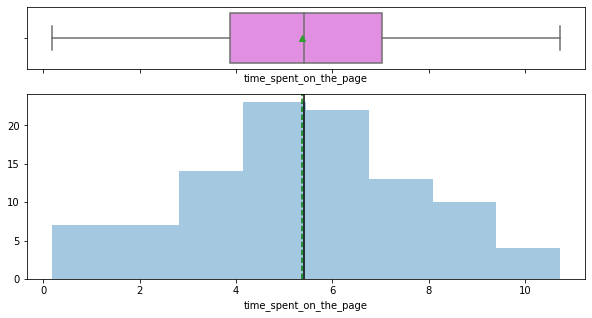

In [15]:
histogram_boxplot(news["time_spent_on_the_page"])

<span style="font-family: Helvetica; font-weight:bold;font-size:1.25em;color:#581845" >Observations
<span style="font-family: Helvetica;font-size:1.5em;color:black" >
<ul>
    <li> There is the slightest difference between the mean and median in this dataset with the limited data, this appears to be slightly skewed to the left. However, the difference between the mean and median is so small that in a bigger dataset if the difference between the mean and the median was the same, it would be considered normally distributed.</li>
    <li> There are no outliers in with this variable.</li>
    <li> From the boxplot, we can see that the third quartile(Q3) is equal to 7.02 seconds which means that 75% of the customers spent less than 7.02 seconds on the page. </li> 
</ul>

In [16]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
    plt.show() # show the plot

<span style="font-family: Helvetica; font-weight:bold;font-size:1.5em;color:#01797D" > Observations on Group

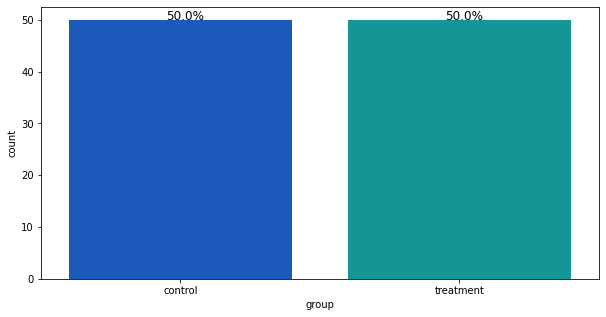

In [17]:
plt.figure(figsize=(10,5))
ax = sns.countplot(news["group"],palette='winter')
perc_on_bar(ax,news["group"])

<span style="font-family: Helvetica; font-weight:bold;font-size:1.25em;color:#581845" >Observations
<span style="font-family: Helvetica;font-size:1.5em;color:black" >
<ul>
    <li> Here we can see the sample was split 50/50 into the control group and the treatment group with 50 participants in each group.</li> 
</ul>

<span style="font-family: Helvetica; font-weight:bold;font-size:1.5em;color:#01797D" > Observations on Landing Page

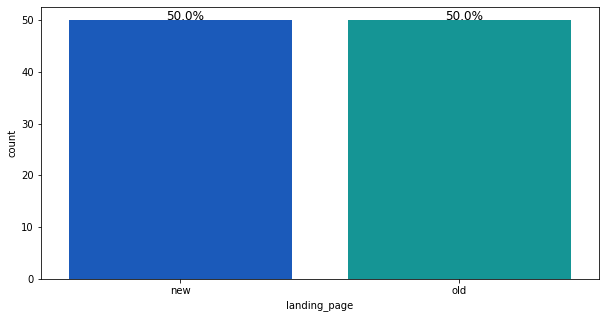

In [18]:
plt.figure(figsize=(10,5))
ax = sns.countplot(news["landing_page"],palette='winter')
perc_on_bar(ax,news["landing_page"])

<span style="font-family: Helvetica; font-weight:bold;font-size:1.25em;color:#581845" >Observations
<span style="font-family: Helvetica;font-size:1.5em;color:black" >
<ul>
    <li> Here we can prove the sample data was split 50/50 with 50 participants viewing the old landing page and 50 viewing the new landing page.</li> 
    <li> As you will see throughout this analysis, since the groups were split between control and treatment and the landing_page was split into old and new, with old being the control and new being the treatment the outcomes of each observation is the same. </li>
</ul>

<span style="font-family: Helvetica; font-weight:bold;font-size:1.5em;color:#01797D" > Observations on Converted

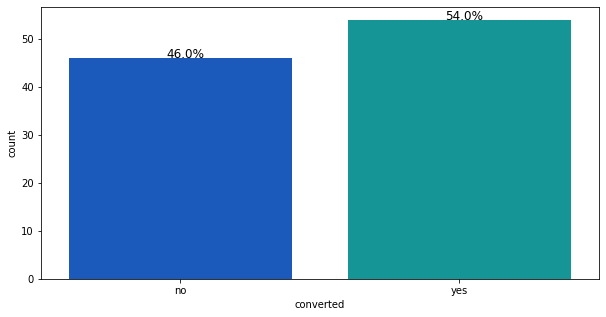

In [19]:
plt.figure(figsize=(10,5))
ax = sns.countplot(news["converted"],palette='winter')
perc_on_bar(ax,news["converted"])

<span style="font-family: Helvetica; font-weight:bold;font-size:1.25em;color:#581845" >Observations
<span style="font-family: Helvetica;font-size:1.5em;color:black" >
<ul>
    <li> This shows that 54% of the people converted and 46% did not convert.</li> 
</ul>

<span style="font-family: Helvetica; font-weight:bold;font-size:1.5em;color:#01797D" > Observations on Language Preferred

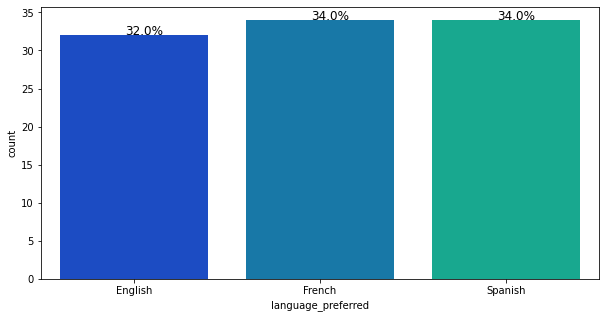

In [20]:
plt.figure(figsize=(10,5))
ax = sns.countplot(news["language_preferred"],palette='winter')
perc_on_bar(ax,news["language_preferred"])

<span style="font-family: Helvetica; font-weight:bold;font-size:1.25em;color:#581845" >Observations
<span style="font-family: Helvetica;font-size:1.5em;color:black" >
<ul>
    <li> There were three languages that were offered. Both Spanish and French were preferred 34% of the time, while English was preferred 32% of the time.</li> 
</ul>

<span style="font-family: Helvetica; font-weight:bold;font-size:1.25em;color:#581845" >Bivariate Analysis

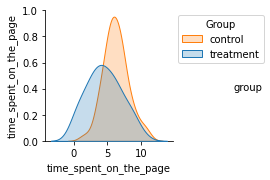

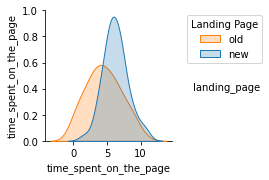

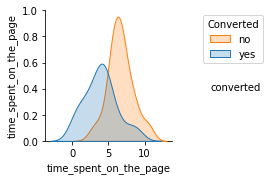

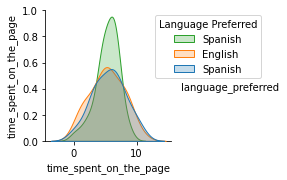

In [21]:
sns.pairplot(data=news.drop(['user_id'],axis=1),hue="group")
plt.legend(news['group'],title='Group',bbox_to_anchor=(1.75,1))
sns.pairplot(data=news.drop(['user_id'],axis=1),hue="landing_page")
plt.legend(news['landing_page'],title='Landing Page',bbox_to_anchor=(1.75,1))
sns.pairplot(data=news.drop(['user_id'],axis=1),hue="converted")
plt.legend(news['converted'],title='Converted',bbox_to_anchor=(1.75,1))
sns.pairplot(data=news.drop(['user_id'],axis=1),hue="language_preferred")
plt.legend(news['language_preferred'],title='Language Preferred',bbox_to_anchor=(1.75,1))
plt.show()

<span style="font-family: Helvetica; font-weight:bold;font-size:1.25em;color:#581845" >Observations
<span style="font-family: Helvetica;font-size:1.5em;color:black" >
<ul>
    <li> Here we can see there is some variation between the variables versus the time spent on the landing page. We need to further investigate this. </li>
</ul>

<span style="font-family: Helvetica; font-weight:bold;font-size:1.5em;color:#01797D" > Group vs Time Spent on the Page

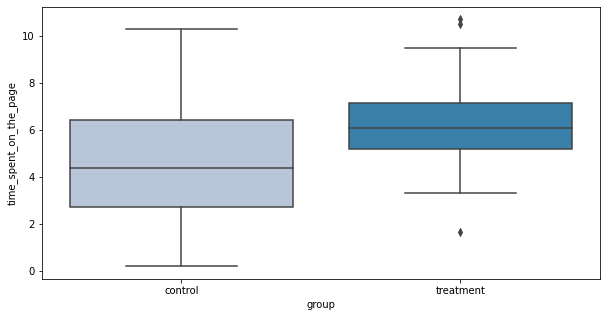

In [22]:
plt.figure(figsize=(10,5))
sns.boxplot(news["group"],news["time_spent_on_the_page"],palette="PuBu")
plt.show()

In [51]:
print('Control',news.drop(['user_id'],axis=1)[news["group"]=="control"].describe())
print("")
print('Treatment',news.drop(['user_id'],axis=1)[news["group"]=="treatment"].describe())

Control        time_spent_on_the_page
count               50.000000
mean                 4.532400
std                  2.581975
min                  0.190000
25%                  2.720000
50%                  4.380000
75%                  6.442500
max                 10.300000

Treatment        time_spent_on_the_page
count               50.000000
mean                 6.223200
std                  1.817031
min                  1.650000
25%                  5.175000
50%                  6.105000
75%                  7.160000
max                 10.710000


<span style="font-family: Helvetica; font-weight:bold;font-size:1.25em;color:#581845" >Observations
<span style="font-family: Helvetica;font-size:1.5em;color:black" >
<ul>
    <li> The control group has a larger variance of 3.72 minutes (Q3-Q1) than the treatment group did with a variance of 1.99 minutes. </li>
    <li> The treament group had a few outliers but 75% of the people spent at least 7.16 minutes on the new page. </li>
</ul>

<span style="font-family: Helvetica; font-weight:bold;font-size:1.5em;color:#01797D" > Landing Page vs Time Spent on the Page

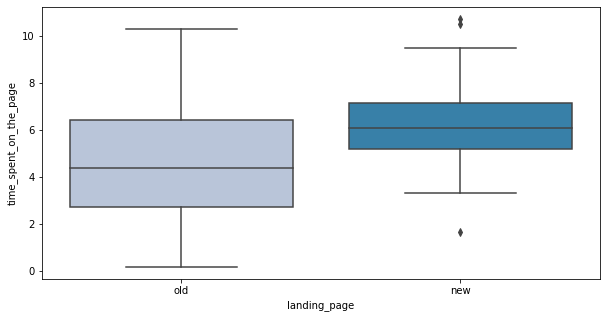

In [39]:
plt.figure(figsize=(10,5))
sns.boxplot(news["landing_page"],news["time_spent_on_the_page"],palette="PuBu",order=['old','new'])
plt.show()

In [49]:
print('Old',news.drop(['user_id'],axis=1)[news["landing_page"]=="old"].describe())
print("")
print('New',news.drop(['user_id'],axis=1)[news["landing_page"]=="new"].describe())

Old        time_spent_on_the_page
count               50.000000
mean                 4.532400
std                  2.581975
min                  0.190000
25%                  2.720000
50%                  4.380000
75%                  6.442500
max                 10.300000

New        time_spent_on_the_page
count               50.000000
mean                 6.223200
std                  1.817031
min                  1.650000
25%                  5.175000
50%                  6.105000
75%                  7.160000
max                 10.710000


<span style="font-family: Helvetica; font-weight:bold;font-size:1.25em;color:#581845" >Observations
<span style="font-family: Helvetica;font-size:1.5em;color:black" >
<ul>
    <li> This shows as stated earlier, that the variables group and landing_page have the same outcomes because of the way the experiment was set up. </li>
</ul>

<span style="font-family: Helvetica; font-weight:bold;font-size:1.5em;color:#01797D" > Converted vs Time Spent on the Page

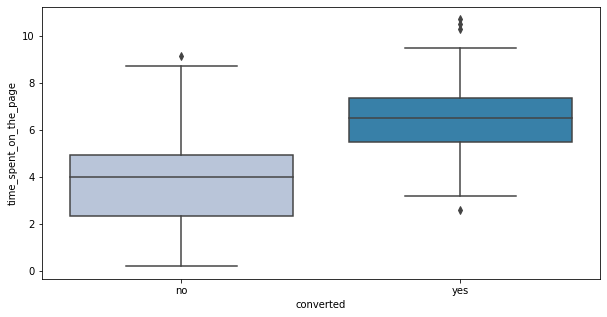

In [43]:
plt.figure(figsize=(10,5))
sns.boxplot(news["converted"],news["time_spent_on_the_page"],palette="PuBu")
plt.show()

In [48]:
print('No',news.drop(['user_id'],axis=1)[news["converted"]=="no"].describe())
print("")
print('Yes',news.drop(['user_id'],axis=1)[news["converted"]=="yes"].describe())

No        time_spent_on_the_page
count               46.000000
mean                 3.915870
std                  2.226897
min                  0.190000
25%                  2.337500
50%                  3.980000
75%                  4.922500
max                  9.150000

Yes        time_spent_on_the_page
count               54.000000
mean                 6.623148
std                  1.708427
min                  2.580000
25%                  5.500000
50%                  6.495000
75%                  7.367500
max                 10.710000


<span style="font-family: Helvetica; font-weight:bold;font-size:1.25em;color:#581845" >Observations
<span style="font-family: Helvetica;font-size:1.5em;color:black" >
<ul>
    <li> This shows us that people who did not convert spent less time on the page than people who did convert. </li>
    <li> 75% of the people who did not convert only spent 4.92 minutes on the page. </li>
    <li> 75% of the people that did convert 7.37 minutes on the page. </li>
</ul>

<span style="font-family: Helvetica; font-weight:bold;font-size:1.5em;color:#01797D" > Language Preferred vs Time Spent on the Page

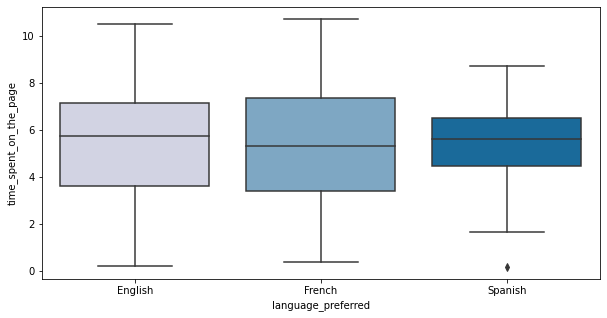

In [53]:
plt.figure(figsize=(10,5))
sns.boxplot(news["language_preferred"],news["time_spent_on_the_page"],palette="PuBu")
plt.show()

In [54]:
print('English',news.drop(['user_id'],axis=1)[news["language_preferred"]=="English"].describe())
print("")
print('French',news.drop(['user_id'],axis=1)[news["language_preferred"]=="French"].describe())
print("")
print('Spanish',news.drop(['user_id'],axis=1)[news["language_preferred"]=="Spanish"].describe())

English        time_spent_on_the_page
count               32.000000
mean                 5.559063
std                  2.621079
min                  0.220000
25%                  3.617500
50%                  5.755000
75%                  7.137500
max                 10.500000

French        time_spent_on_the_page
count               34.000000
mean                 5.253235
std                  2.675413
min                  0.400000
25%                  3.395000
50%                  5.315000
75%                  7.367500
max                 10.710000

Spanish        time_spent_on_the_page
count               34.000000
mean                 5.331765
std                  1.818095
min                  0.190000
25%                  4.475000
50%                  5.605000
75%                  6.515000
max                  8.720000


<span style="font-family: Helvetica; font-weight:bold;font-size:1.25em;color:#581845" >Observations
<span style="font-family: Helvetica;font-size:1.5em;color:black" >
<ul>
    <li> The three languages all had very similar medians at approximately 5 minutes. </li>
    <li> Spanish had a much smaller variance though.  </li>
</ul>

In [55]:
# Function to create barplots that indicate percentage for each category.

def count_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    for i in range(len(news)): 
        ax.annotate(str(news.loc[i,'counts']), 
                xy=(i,news.loc[i,'counts']))# annotate the count
    plt.show() # show the plot

<span style="font-family: Helvetica; font-weight:bold;font-size:1.5em;color:#01797D" > Group Divided by Landing Page

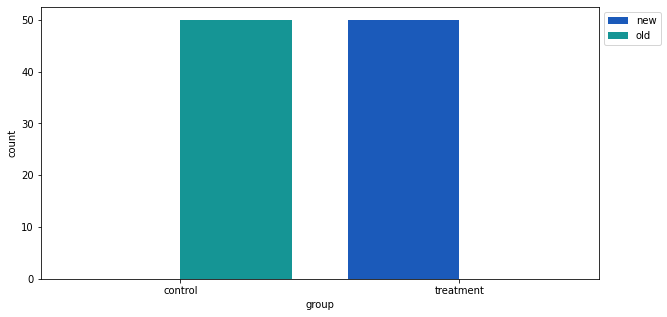

In [56]:
plt.figure(figsize=(10,5))
sns.countplot(news["group"],hue=news["landing_page"],palette='winter')
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

<span style="font-family: Helvetica; font-weight:bold;font-size:1.25em;color:#581845" >Observations
<span style="font-family: Helvetica;font-size:1.5em;color:black" >
<ul>
    <li> This again shows there are 50 people in each group that viewed each page based off of what group they were in.</li>
</ul>

<span style="font-family: Helvetica; font-weight:bold;font-size:1.5em;color:#01797D" > Group Divided by Converted

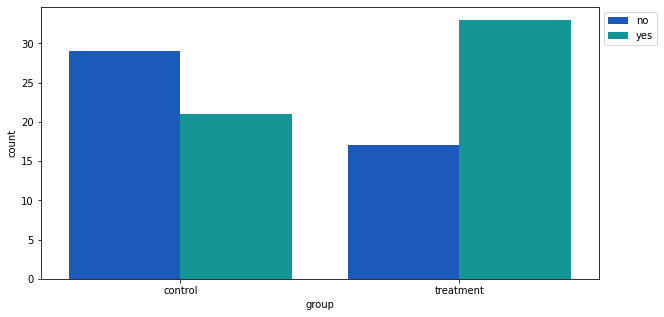

In [86]:
plt.figure(figsize=(10,5))
sns.countplot(news["group"],hue=news["converted"],palette='winter')
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

<span style="font-family: Helvetica; font-weight:bold;font-size:1.25em;color:#581845" >Observations
<span style="font-family: Helvetica;font-size:1.5em;color:black" >
<ul>
    <li> This again shows there are 50 people in each group that viewed each page based off of what group they were in.</li>
</ul>

<span style="font-family: Helvetica; font-weight:bold;font-size:1.5em;color:#01797D" > Group Divided by Language Preferred

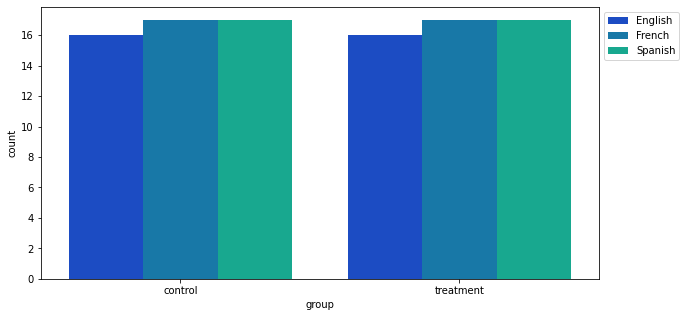

In [87]:
plt.figure(figsize=(10,5))
sns.countplot(news["group"],hue=news["language_preferred"],palette='winter')
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

<span style="font-family: Helvetica; font-weight:bold;font-size:1.5em;color:#01797D" > Converted by Language Preferred

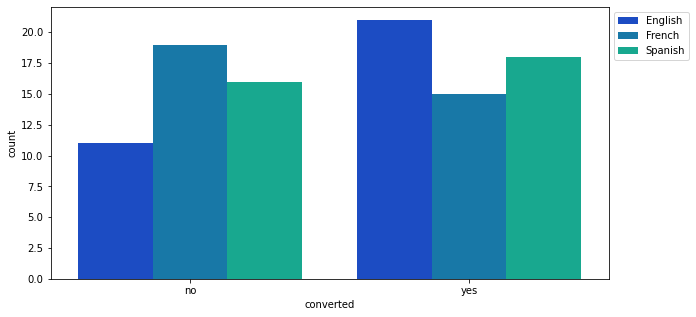

In [88]:
plt.figure(figsize=(10,5))
sns.countplot(news["converted"],hue=news["language_preferred"],palette='winter')
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

<span style="font-family: Helvetica; font-weight:bold;font-size:1.25em;color:#581845" >Multivariate Analysis

<span style="font-family: Helvetica; font-weight:bold;font-size:1.5em;color:#01797D" > Landing Page vs Time Spent on the Page by Converted

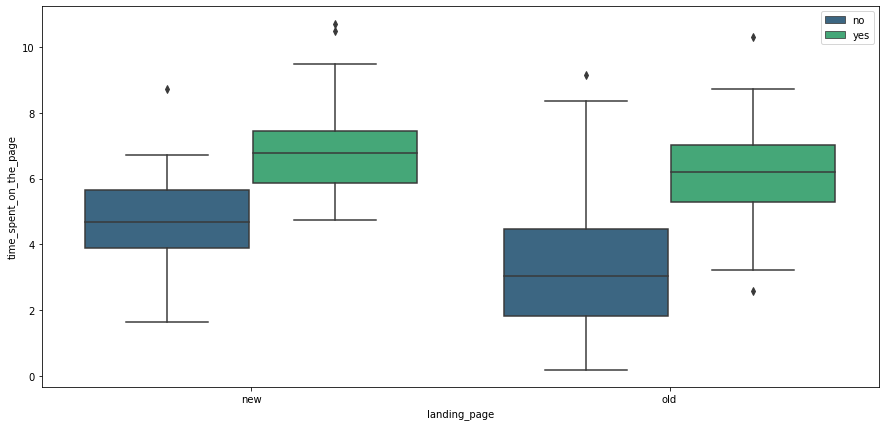

In [89]:
plt.figure(figsize=(15,7))
sns.boxplot(news["landing_page"],news["time_spent_on_the_page"],hue=news["converted"],palette="viridis")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

<span style="font-family: Helvetica; font-weight:bold;font-size:1.5em;color:#01797D" > Landing Page vs Time Spent on the Page by Preferred Language

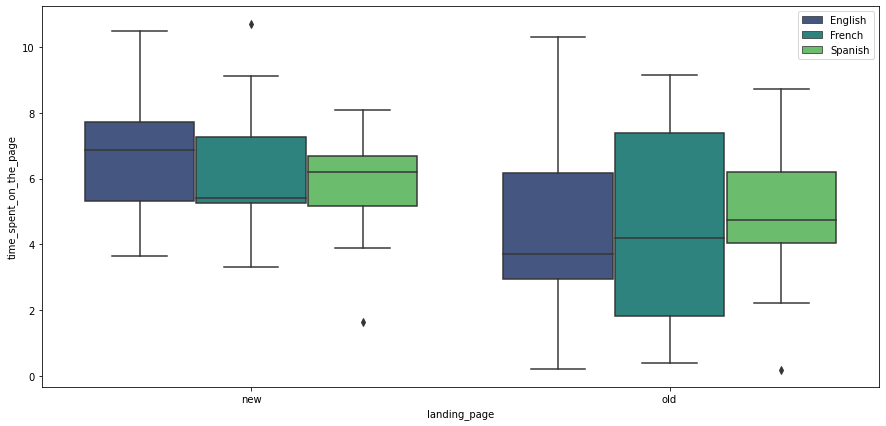

In [106]:
plt.figure(figsize=(15,7))
sns.boxplot(news["landing_page"],news["time_spent_on_the_page"],hue=news["language_preferred"],palette="viridis")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

<a style="font-family: Helvetica; font-weight:bold;font-size:1.5em;color:#01797D"
   name='link5'>Part Two: Do the users spend more time on the new landing page than the old landing page?</a>

<span style="font-family: Helvetica; font-weight:bold;font-size:1.25em;color:#581845" > Let's Write the Null and Alternative Hypothesis

We will test the null hypothesis

>$H_0:$ Users spend less than or equal amount of time on the new landing page.  

against the alternative hypothesis

>$H_a:$ Users spend more time on the new landing page.  

<span style="font-family: Helvetica; font-weight:bold;font-size:1.25em;color:#581845" > Let's Test Whether the Assumptions are Satisfied or Not

<span style="font-family: Helvetica;font-size:1.0em;color:black" >
<ul>
    <li> Continuous data - Yes, time is measured on a continuous scale.</li>
    <li> Normally distributed populations - Yes, we are informed that the populations are assumed to be normal.</li>
    <li> Independent populations - As we are taking random samples for two different groups, the two samples are from two independent populations.</li>
    <li> Unequal population standard deviations - As the sample standard deviations are different, the population standard deviations may be assumed to be different.</li>
    <li> Random sampling from the population - Yes, we are informed that the collected sample a simple random sample.</li>
</ul>

<span style="font-family: Helvetica; font-weight:bold;font-size:1.25em;color:#581845" > Calculate the p-value

In [90]:
# import the required functions
from scipy.stats import ttest_ind
# prepare the data
old_page = news[news.landing_page=='old']['time_spent_on_the_page']
new_page = news[news.landing_page=='new']['time_spent_on_the_page']
# find the p-value
test_stat, p_value = ttest_ind(old_page, new_page, alternative = 'less')
print('The p-value is ', p_value)

The p-value is  0.0001316123528095005


<span style="font-family: Helvetica; font-weight:bold;font-size:1.25em;color:#581845" > Compare the p-value with α

In [91]:
alpha_value = 0.05 # Level of significance
print('Level of significance: %.2f' %alpha_value)
if p_value < alpha_value: 
    print('We have evidence to reject the null hypothesis since p value {0} is less than the Level of significance'.format(p_value))
else:
    print('We have no evidence to reject the null hypothesis since p value {0} is greater than the Level of significance'.format(p_value))

Level of significance: 0.05
We have evidence to reject the null hypothesis since p value 0.0001316123528095005 is less than the Level of significance


<span style="font-family: Helvetica; font-weight:bold;font-size:1.25em;color:#581845" > Conclusion

<span style="font-family: Helvetica;font-size:1.0em;color:black" >Since the pvalue is < 0.05, we have enough evidence to reject the null hypothesis. Hence, we do have enough statistical evidence to say that users spend more time on the new landing page. 

<a style="font-family: Helvetica; font-weight:bold;font-size:1.5em;color:#01797D"
   name='link6'>Part Three: Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?</a>

<span style="font-family: Helvetica; font-weight:bold;font-size:1.25em;color:#581845" > Let's Write the Null and Alternative Hypothesis

We will test the null hypothesis

>$H_0:$ The conversion rate for the new page is less than or equal to the conversion rate of people on the old page. 

against the alternative hypothesis

>$H_a:$ The conversion rate for the new page is greater than the conversion rate of people on the old page. 

<span style="font-family: Helvetica; font-weight:bold;font-size:1.25em;color:#581845" > Let's Test Whether the Assumptions are Satisfied or Not

<span style="font-family: Helvetica;font-size:1.0em;color:black" >
<ul>
    <li> Binomally distributed population - Yes, the user either converted or did not.</li>
    <li> Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.</li>
    <li> Can the binomial distribution approximated to normal distribution - Yes. For binary data, CLT works slower than usual.</li>
</ul>

<span style="font-family: Helvetica; font-weight:bold;font-size:1.25em;color:#581845" > Data Preparation

In [92]:
# To calculate the conversion rate of each page I created variables that counted the amount of yeses and nos for the old and new pages. 
old_page_yes = news[news.landing_page=='old'][news.converted=='yes']
old_page_no = news[news.landing_page=='old'][news.converted=='no']
new_page_yes = news[news.landing_page=='new'][news.converted=='yes']
new_page_no = news[news.landing_page=='new'][news.converted=='no']
total_yes = old_page_yes.count() + new_page_yes.count()

In [93]:
print('Old Page, Yes and No',old_page_yes.converted.count(), old_page_no.converted.count())
print('New Page, Yes and No',new_page_yes.converted.count(), new_page_no.converted.count())
print('Total Yeses', total_yes)

Old Page, Yes and No 21 29
New Page, Yes and No 33 17
Total Yeses user_id                   54
group                     54
landing_page              54
time_spent_on_the_page    54
converted                 54
language_preferred        54
dtype: int64


In [94]:
# This creates the conversion by dividing the yes count with the total count
conversion_old = old_page_yes.count()/(old_page_yes.count() + old_page_no.count())
conversion_new = new_page_yes.count()/(new_page_yes.count() + new_page_no.count())

In [95]:
print('Old Conversion Rate',conversion_old) 
print("")
print('New Conversion Rate',conversion_new)

Old Conversion Rate user_id                   0.42
group                     0.42
landing_page              0.42
time_spent_on_the_page    0.42
converted                 0.42
language_preferred        0.42
dtype: float64

New Conversion Rate user_id                   0.66
group                     0.66
landing_page              0.66
time_spent_on_the_page    0.66
converted                 0.66
language_preferred        0.66
dtype: float64


<span style="font-family: Helvetica; font-weight:bold;font-size:1.25em;color:#581845" > Calculate the p-value

In [96]:
# import the required fuction
from statsmodels.stats.proportion import proportions_ztest

# set the counts of defective items
converted = np.array([21, 33])

# set the sample sizes
nobs = np.array([50, 50])

# find the p-value
test_stat, p_value = proportions_ztest(converted, nobs)
print('The p-value is ' + str(p_value))

The p-value is 0.016052616408112556


<span style="font-family: Helvetica; font-weight:bold;font-size:1.25em;color:#581845" > Compare the p-value with α

In [97]:
alpha_value = 0.05 # Level of significance
print('Level of significance: %.2f' %alpha_value)
if p_value < alpha_value: 
    print('We have evidence to reject the null hypothesis since p value {0} is less than the Level of significance'.format(p_value))
else:
    print('We have no evidence to reject the null hypothesis since p value {0} is greater than the Level of significance'.format(p_value))

Level of significance: 0.05
We have evidence to reject the null hypothesis since p value 0.016052616408112556 is less than the Level of significance


<span style="font-family: Helvetica; font-weight:bold;font-size:1.25em;color:#581845" > Conclusion

<span style="font-family: Helvetica;font-size:1.0em;color:black" >Since the pvalue is < 0.05, we have enough evidence to reject the null hypothesis. Hence, we do have enough statistical evidence to say that the conversion rate on the new page is greater than the conversion on the old page.

<a style="font-family: Helvetica; font-weight:bold;font-size:1.5em;color:#01797D"
   name='link7'>Part Four: Does the converted status depend on the preferred language? [Hint: Create a contingency table using the pandas.crosstab() function]</a>

<span style="font-family: Helvetica; font-weight:bold;font-size:1.25em;color:#581845" > Creating the Contingency Table

In [98]:
crosstab = pd.crosstab(news.converted, news.language_preferred)
crosstab

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


<span style="font-family: Helvetica; font-weight:bold;font-size:1.25em;color:#581845" > Let's Write the Null and Alternative Hypothesis

We will test the null hypothesis

>$H_0:$ Converted status is independent on preferred language.

against the alternative hypothesis

>$H_a:$ Converted status depends on preferred language.

<span style="font-family: Helvetica; font-weight:bold;font-size:1.25em;color:#581845" > Let's Test Whether the Assumptions are Satisfied or Not

<span style="font-family: Helvetica;font-size:1.0em;color:black" >
<ul>
    <li> Categorical variables - Yes</li>
    <li>Expected value of the number of sample observations in each level of the variable is at least 5 - Yes, the number of observations in each level is greater than 5.</li>
    <li>Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.</li>
</ul>

<span style="font-family: Helvetica; font-weight:bold;font-size:1.25em;color:#581845" > Selecting the Appropriate Test

<span style="font-family: Helvetica;font-size:1.0em;color:black" >As stated in the NEP Case Study on Chi-Square Test of Independence, the formulated hypotheses can be tested using a Chi-Square Test of Independence of Attributes, concerning the two categorical variables, Preferred Lanaguage and Converted. 

<span style="font-family: Helvetica; font-weight:bold;font-size:1.25em;color:#581845" > Decide the Significance Level

<span style="font-family: Helvetica;font-size:1.0em;color:black" >Here, we select α= 0.05.

<span style="font-family: Helvetica; font-weight:bold;font-size:1.25em;color:#581845" > Data Preparation

<span style="font-family: Helvetica;font-size:1.0em;color:black" > In this problem the data did not need to be changed.

<span style="font-family: Helvetica; font-weight:bold;font-size:1.25em;color:#581845" > Calculate the p-value

In [99]:
# import the required function
from scipy.stats import chi2_contingency

# find the p-value
chi, p_value, dof, expected = chi2_contingency(crosstab)
print('The p-value is', p_value)

The p-value is 0.21298887487543447


<span style="font-family: Helvetica; font-weight:bold;font-size:1.25em;color:#581845" > Compare the p-value with α

In [100]:
alpha_value = 0.05 # Level of significance
print('Level of significance: %.2f' %alpha_value)
if p_value < alpha_value: 
    print('We have evidence to reject the null hypothesis since p value {0} is less than the Level of significance'.format(p_value))
else:
    print('We have no evidence to reject the null hypothesis since p value {0} is greater than the Level of significance'.format(p_value))

Level of significance: 0.05
We have no evidence to reject the null hypothesis since p value 0.21298887487543447 is greater than the Level of significance


<span style="font-family: Helvetica; font-weight:bold;font-size:1.25em;color:#581845" > Conclusion

<span style="font-family: Helvetica;font-size:1.0em;color:black" >Since the pvalue is > 0.05, we fail to reject the null hypothesis. Hence, we do not have enough statistical evidence to say that converted status is dependent on preferred language.

<a style="font-family: Helvetica; font-weight:bold;font-size:1.5em;color:#01797D"
   name='link8'>Part Five: Is the mean time spent on the new page same for the different language users?</a>

<span style="font-family: Helvetica;font-size:1.0em;color:black" >Here, time_spent_on_the_page is the response and language_preferred is the factor.

In [101]:
# get the levels of factor fuel_type
news['language_preferred'].value_counts()

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64

<span style="font-family: Helvetica; font-weight:bold;font-size:1.25em;color:#581845" > Let's Write the Null and Alternative Hypothesis

We will test the null hypothesis

>$H_0:$ The mean time spent on the new page is equal for the different language users. 

against the alternative hypothesis

>$H_a:$ At least one of the preferred languages had a different mean time spent on the new page. 

<span style="font-family: Helvetica; font-weight:bold;font-size:1.25em;color:#581845" > Selecting the Appropriate Test

<span style="font-family: Helvetica;font-size:1.0em;color:black" >
<ul>
    <li> For testing of normality, Shapiro-Wilk’s test is applied to the response variable.</li>
    <li>For equality of variance, Levene test is applied to the response variable. </li>
</ul>

<span style="font-family: Helvetica; font-weight:bold;font-size:1.25em;color:#581845" > Shapiro-Wilk's Test

We will test the null hypothesis

>$H_0:$ Time spent on the new page follows a normal distribution. 

against the alternative hypothesis

>$H_a:$ Time spent on the new page does not follow a normal distribution. 

In [102]:
# Assumption 1: Normality
# import the required function
from scipy import stats

# find the p-value
w, p_value = stats.shapiro(news['time_spent_on_the_page']) 
print('The p-value is', p_value)

The p-value is 0.5643684267997742


<span style="font-family: Helvetica;font-size:1.0em;color:black" >Since the p-value of the test is very large, we fail to reject the null hypothesis that the response follows the normal distribution.

<span style="font-family: Helvetica; font-weight:bold;font-size:1.25em;color:#581845" > Levene's Test

We will test the null hypothesis

>$H_0:$ All the population variances are equal. 

against the alternative hypothesis

>$H_a:$ At least one variance is different from the rest.  

In [103]:
#Assumption 2: Homogeneity of Variance
#import the required function
from scipy.stats import levene
statistic, p_value = levene( news['time_spent_on_the_page'][news['language_preferred']=="English"], 
                                   news['time_spent_on_the_page'][news['language_preferred']=="French"], 
                                   news['time_spent_on_the_page'][news['language_preferred']=="Spanish"])
# find the p-value
print('The p-value is', p_value)

The p-value is 0.06515086840327314


<span style="font-family: Helvetica;font-size:1.0em;color:black" >Since the p-value is bigger than 0.05, we fail to reject the null hypothesis that the response follows the normal distribution.

<span style="font-family: Helvetica; font-weight:bold;font-size:1.25em;color:#581845" > Let's Test Whether the Assumptions are Satisfied or Not 

<span style="font-family: Helvetica;font-size:1.0em;color:black" >
<ul>
    <li> The populations are normally distributed - Yes, the normality assumption is verified using the Shapiro-Wilk’s test.</li>
    <li>Samples are independent simple random samples - Yes, we are informed that the collected sample is a simple random sample. </li>
    <li>Population variances are equal - Yes, the homogeneity of variance assumption is verified using the Levene's test.</li>
</ul>

<span style="font-family: Helvetica; font-weight:bold;font-size:1.25em;color:#581845" > Calculate the p-value

In [104]:
#import the required function
from scipy.stats import f_oneway

# perform one-way anova test
test_stat, p_value = f_oneway(news.loc[news['language_preferred'] == 'English', 'time_spent_on_the_page'],
                              news.loc[news['language_preferred'] == 'French', 'time_spent_on_the_page'],
                              news.loc[news['language_preferred'] == 'Spanish', 'time_spent_on_the_page'])
print('The p-value is ' + str(p_value))

The p-value is 0.8665610536012648


<span style="font-family: Helvetica; font-weight:bold;font-size:1.25em;color:#581845" > Compare the p-value with α

In [105]:
alpha_value = 0.05 # Level of significance
print('Level of significance: %.2f' %alpha_value)
if p_value < alpha_value: 
    print('We have evidence to reject the null hypothesis since p value {0} is less than the Level of significance'.format(p_value))
else:
    print('We have no evidence to reject the null hypothesis since p value {0} is greater than the Level of significance'.format(p_value))

Level of significance: 0.05
We have no evidence to reject the null hypothesis since p value 0.8665610536012648 is greater than the Level of significance


<span style="font-family: Helvetica; font-weight:bold;font-size:1.25em;color:#581845" > Conclusion

<span style="font-family: Helvetica;font-size:1.0em;color:black" >As the p-value is much larger than the significance level, we cannot reject the null hypothesis. Hence, we do not have enough statistical significance to conclude that at least one preferred language is different from the rest at 5% significance level.